In the world of online shopping, understanding key numbers is crucial for success. This analysis dives into an e-commerce dataset to uncover important insights that can help businesses grow smarter and keep customers happy.

What We're Looking At:

- Revenue

- Growth in Revenue

- Revenue by Gender and Country

- Average Revenue per Customer (ARPC)

- Average Order Value (AOV)

- Lifetime Analysis

- Retention

- New vs. Existing Users Growth

- Count of New Users

- ABC Analysis of Product Categories

## Data reading & preparation for analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data reading

df = pd.read_csv('/Users/alex/Downloads/E-Commerce.csv')

Let's take a look at the data sample

In [3]:
df.sample(5)

,CustomerID,Gender,InvoiceDate,InvoiceNumber,ProductID,Quantity,Price,Total,OrderStatus,Country,TrafficSource,SessionDuration,DeviceCategory,Device,OS,DeliveryRating,ProductRating,Sales
2543,3731,Male,7/22/2022,53169400,34,1,48.24,48.24,In Process,China,Organic Search,4.30,Computer,Desktop,Windows,3,5,0.00
2565,1840,Male,8/1/2022,95083969,80,2,77.64,155.28,In Process,Spain,Organic Search,4.97,Mobile,Smart Phone,Android,4,5,0.00
392,9189,Male,7/16/2019,87054572,90,2,21.51,43.02,Completed,France,Social Media,9.57,Computer,Laptop,Windows,4,3,43.02
3040,6637,Female,3/28/2023,26466812,91,1,67.48,67.48,Completed,Japan,Paid Advertisment,1.69,Computer,Desktop,Windows,5,2,67.48
1466,2355,Female,1/9/2021,80269440,37,1,11.50,11.50,Completed,Russia,Social Media,9.23,Computer,Desktop,Windows,3,4,11.50


In [4]:
# Checking data size and types to understand what we are about to deal with

print(df.shape)
print(df.dtypes)

(3599, 18)
CustomerID           int64
Gender              object
InvoiceDate         object
InvoiceNumber        int64
ProductID            int64
Quantity             int64
Price              float64
Total              float64
OrderStatus         object
Country             object
TrafficSource       object
SessionDuration    float64
DeviceCategory      object
Device              object
OS                  object
DeliveryRating       int64
ProductRating        int64
Sales              float64
dtype: object


### Data Description:

CustomerID - unique customer ID

Gender - customer gender

InvoiceDate - date of order

InvoiceNumber - order number

ProductID - unique product ID

Quantity - quantity of product units in the order

Price - price per unit of the product

Total - total order amount

OrderStatus - order status

Country - country from which the order was made

TrafficSource - how the customer learned about the store

SessionDuration - how many minutes the customer spent on the website

DeviceCategory - device from which the order was made

Device - device type clarification

OS - operating system

DeliveryRating - delivery rating of the product

ProductRating - product rating

Sales - money received


All columns, except for the order date, already have the necessary data types defined. For the required calculations, let's convert this column to the datetime format.

In [5]:
# Converting 'InvoiceDate' column to datetime format

date_columns = ['InvoiceDate']
for col in date_columns:
    df['InvoiceDate'] = pd.to_datetime(df[col], format='%m/%d/%Y')

Let's take a quick glance on our data.

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,3599.0,5526.962767,1111.0,3288.0,5546.0,7777.0,9998.0,2586.425565
InvoiceDate,3599,2021-07-02 19:16:19.272019968,2019-01-01 00:00:00,2020-03-29 12:00:00,2021-07-03 00:00:00,2022-10-12 00:00:00,2023-12-31 00:00:00,NaN
InvoiceNumber,3599.0,55821174.644624,11140552.0,33556990.0,56142928.0,78101595.0,99963542.0,25681685.470749
ProductID,3599.0,50.864962,1.0,26.0,52.0,76.0,100.0,29.035862
Quantity,3599.0,2.000556,1.0,1.0,2.0,3.0,3.0,0.813313
Price,3599.0,48.714571,1.22,26.03,43.5,74.55,99.72,29.499165
Total,3599.0,97.394143,1.22,37.61,81.46,147.06,299.16,74.421471
SessionDuration,3599.0,4.992101,0.01,2.49,4.93,7.515,10.0,2.896605
DeliveryRating,3599.0,4.23312,1.0,4.0,4.0,5.0,5.0,0.925732
ProductRating,3599.0,4.243123,1.0,4.0,4.0,5.0,5.0,0.913165


Here we make a simple plot to vizualize the distribution of total order sum.

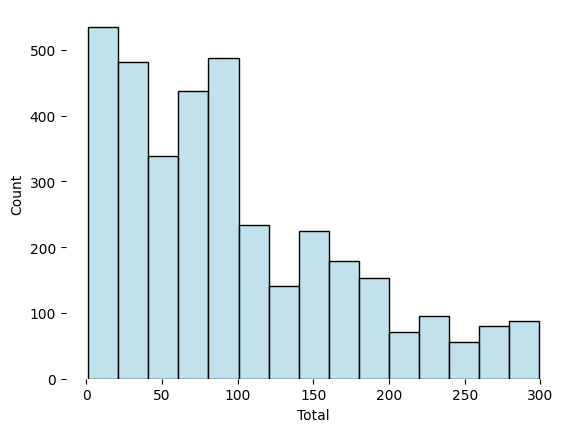

In [7]:
plt.box(False)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
sns.histplot(data=df.Total, bins = 15, color = 'lightblue')
plt.show()

Typically, we see that clients make orders under USD 100 far more frequent than USD 100$ ones.

Vizlualization of missed data

<Axes: >

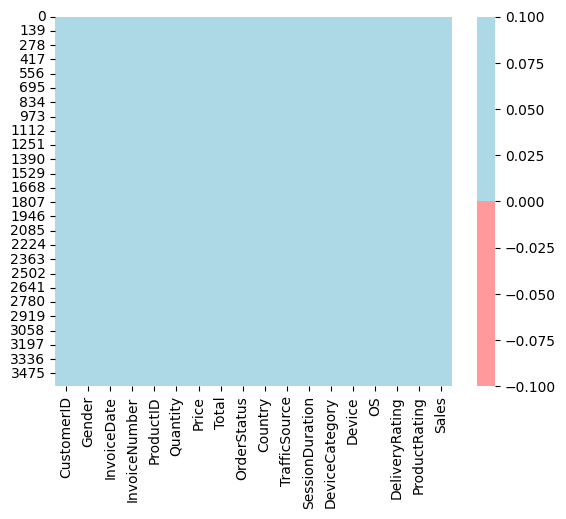

In [8]:
# light blue - present data 
# light red - missed data

colors = ['#FF999C','#ADD8E6'] 
sns.heatmap(df[df.columns[:18]].isnull(), cmap=sns.color_palette(colors))

We have no missed data, it is usual for dataset from Kaggle

In [9]:
# For further convenience in calculations, we calculate and create separate columns for the month, quarter, and year of the invoice. And also 

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_month'] = df.InvoiceDate.apply(lambda x: x.month)
df['InvoiceDate_quarter'] = df.InvoiceDate.apply(lambda x: x.quarter)
df['InvoiceDate_year'] = df.InvoiceDate.apply(lambda x: x.year)

# Additionally, we create a separate column "InvoiceDate_year_quarter" since the main metrics will be calculated on a quarterly basis.

df['InvoiceDate_year_quarter'] = df['InvoiceDate_quarter'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['InvoiceDate_year_quarter'] = df['InvoiceDate_year'].astype(str) + '-' + df['InvoiceDate_year_quarter'].astype(str)

## Analysis

This type of sales analysis looks for patterns in sales data. We'll use it to track company's progress over the time, while simultaneously understanding sales patterns in specific products, customers, and/or geographies.

### Revenue

Calculation and visualization of revenue

In [10]:
# Creating a visual table with quarterly revenue output

df_quarter_sales = df.groupby(['InvoiceDate_year', 'InvoiceDate_quarter'])['Total'].sum().reset_index()
print(df_quarter_sales)

    InvoiceDate_year  InvoiceDate_quarter     Total
0               2019                    1  16833.79
1               2019                    2  17389.03
2               2019                    3  18236.46
3               2019                    4  18214.21
4               2020                    1  18671.06
5               2020                    2  18270.41
6               2020                    3  17893.76
7               2020                    4  18965.42
8               2021                    1  15820.14
9               2021                    2  15948.17
10              2021                    3  18606.52
11              2021                    4  17615.85
12              2022                    1  16582.26
13              2022                    2  16308.90
14              2022                    3  17524.34
15              2022                    4  17722.70
16              2023                    1  17075.81
17              2023                    2  17561.67
18          

In [11]:
# Creating a visual table with yearly revenue output

df_year_sales = df.groupby(['InvoiceDate_year'])['Total'].sum().reset_index()
print(df_year_sales)

   InvoiceDate_year     Total
0              2019  70673.49
1              2020  73800.65
2              2021  67990.68
3              2022  68138.20
4              2023  69918.50


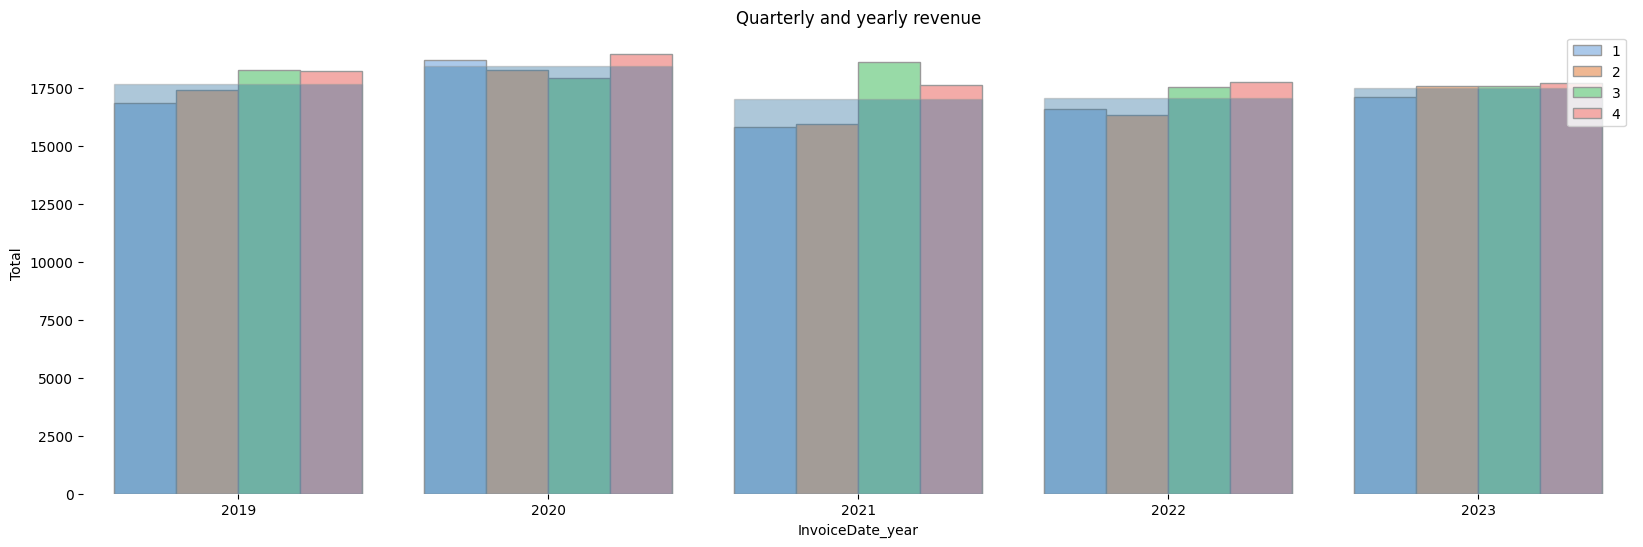

In [12]:
# Creating a histogram visualizing yearly and quarterly revenue output

plt.figure(figsize=(20, 6))
plt.box(False)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
sns.barplot(data=df_quarter_sales, x='InvoiceDate_year', y='Total', hue='InvoiceDate_quarter',palette="pastel",alpha=1,errorbar=None, edgecolor=".6")
sns.barplot(data=df_quarter_sales, x='InvoiceDate_year', y='Total', alpha=0.4,errorbar=None, edgecolor=".6")
plt.title('Quarterly and yearly revenue')
plt.show()


The pivot table and graph show that annual revenue may undergo significant fluctuations, ranging from a minimum value in 2022 to a maximum in 2020, with a variation within quite high 7.6%.

Quarterly revenue exhibits more substantial variations. The minimum value in the 1st quarter of 2021 is 16,5% less than the maximum in the 4th quarter of 2020.
 
Normally, revenue in the 4 quarter is the highest, the only year that remains out of stats is 2021.

It is important to mention that the total revenue even dropped a bit in 2023 compared to 2019(-1.06%). Assuming the 19.2% inflation rate from 2019 to 2023, we can state that company's real income has dropped(-20.1%)

### Calculation of quarterly revenue growth

In [13]:
# Creating a visual table with quarterly revenue growth

df_quart = df.groupby(['InvoiceDate_year_quarter'])['Total'].sum().reset_index()
df_quart['QuarterlyGrowth'] = df_quart['Total'].pct_change()*100
df_quart['QuarterlyGrowth'] = df_quart['QuarterlyGrowth'].round(1)
df_quart['cum'] = df_quart['QuarterlyGrowth'].cumsum()
df_quart

,InvoiceDate_year_quarter,Total,QuarterlyGrowth,cum
0,2019-01,16833.79,NaN,NaN
1,2019-02,17389.03,3.3,3.3
2,2019-03,18236.46,4.9,8.2
3,2019-04,18214.21,-0.1,8.1
4,2020-01,18671.06,2.5,10.6
5,2020-02,18270.41,-2.1,8.5
6,2020-03,17893.76,-2.1,6.4
7,2020-04,18965.42,6.0,12.4
8,2021-01,15820.14,-16.6,-4.2
9,2021-02,15948.17,0.8,-3.4


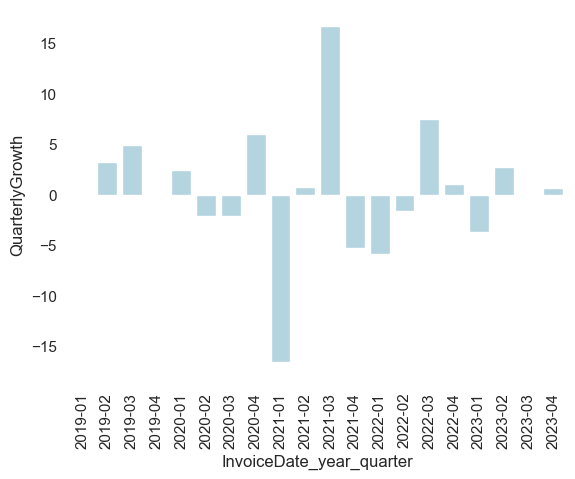

In [35]:
# Creating a bar plot visualizing quarterly revenue growth

plt.box(False)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
sns.barplot(data=df_quart, x = 'InvoiceDate_year_quarter', y = 'QuarterlyGrowth', color = 'lightblue')
plt.xticks(rotation=90)
plt.show()

Due to some reasons, company experienced significant drops during first 2 quarters of 2021 and first 3 quarters of 2022. That's why the quarterly revenue remained almost the same if we compare the 1st and the last quarters the timeframe we have.

### Revenue based on gender and country



In [15]:
# Calculations and preparing a table that reflects total revenue broken down by country & gender

df_gender_country = df.groupby(['Country','Gender'])['Total'].sum().reset_index()
df_gender_country['Percentage'] = round(df_gender_country.groupby('Country')['Total'].transform(lambda x: (x / x.sum()) * 100),2)
df_gender_country.sort_values(by='Percentage', ascending = False)

,Country,Gender,Total,Percentage
15,France,Male,11874.83,76.90
29,Mexico,Male,9533.94,73.44
51,Thailand,Male,2557.84,72.87
1,Argentina,Male,3469.44,72.61
35,Philippines,Male,3110.51,72.56
45,Spain,Male,9449.04,72.37
19,India,Male,13762.97,72.02
23,Iran,Male,1817.66,71.74
53,Turkey,Male,5753.57,71.26
27,Japan,Male,18698.41,70.70


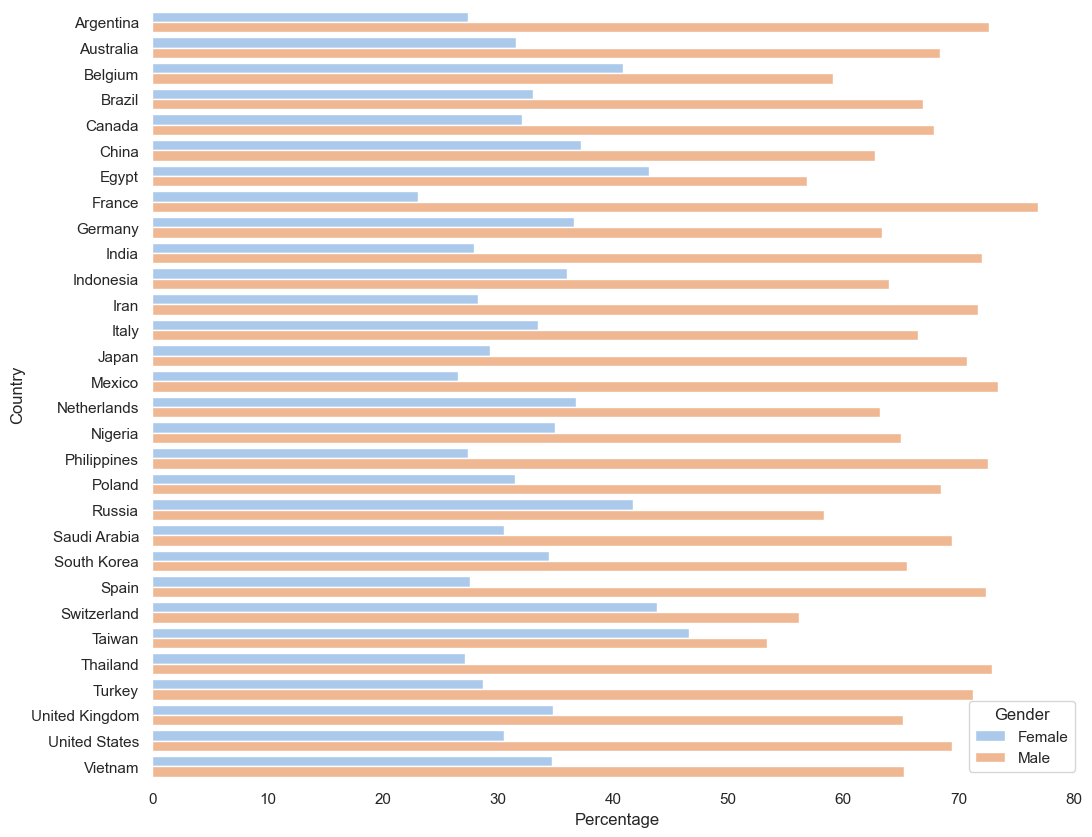

In [36]:
# Visualization of the percentage distribution of revenue between men and women by country
plt.figure(figsize=(12, 10))
plt.box(False)
sns.barplot(df_gender_country, x="Percentage", y='Country', hue="Gender", palette = 'pastel')
plt.show()

As we can see, in the overwhelming majority of countries, orders made by men bring more revenue than orders made by women. The highest disproportion is observed in France where men bring 76.9% of revenue. Taiwan is the closest country to make this proportion even - 46.62% of revenue from this country is brought by men.




### Revenue based on country


In [17]:
# Calculations and preparing a table that reflects total revenue broken down by country

df_country= df.groupby(['Country'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
df_country


,Country,Total
28,United States,29958.36
13,Japan,26446.74
5,China,23700.73
27,United Kingdom,21326.21
8,Germany,20526.35
9,India,19110.14
21,South Korea,18541.27
4,Canada,17341.18
12,Italy,15562.69
7,France,15442.01


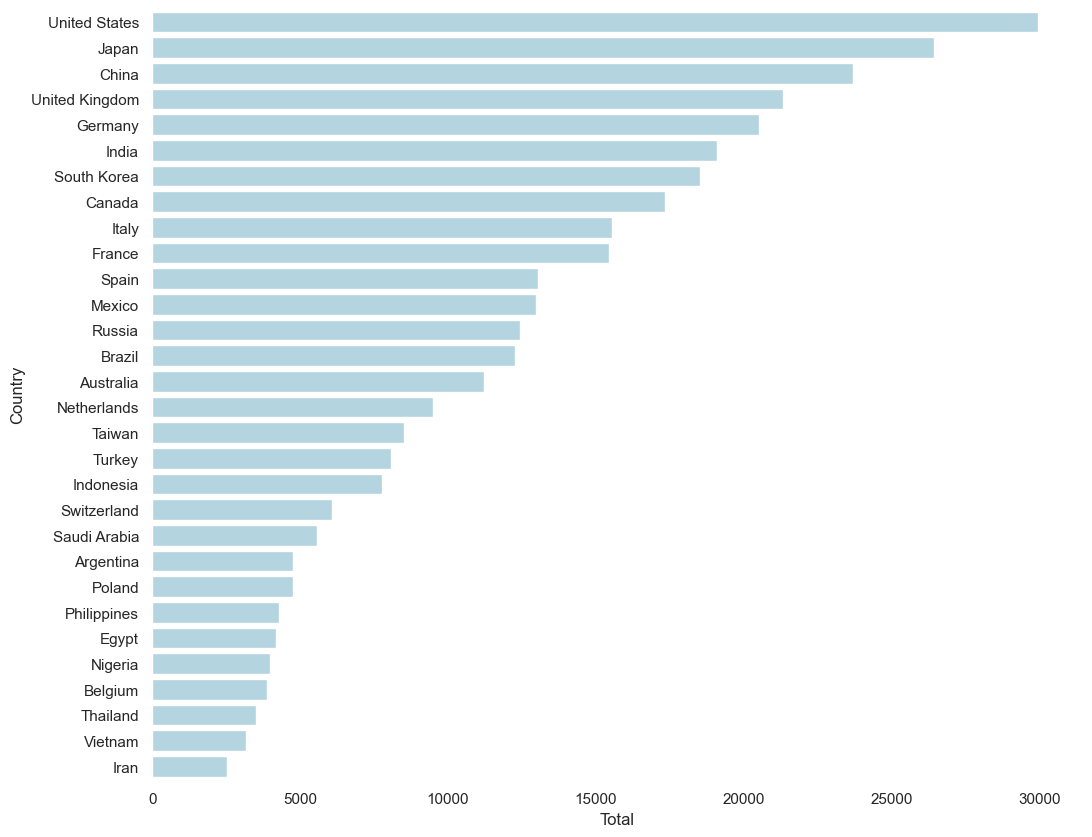

In [37]:
# Visualization of the distribution of total revenue by country

plt.figure(figsize=(12, 10))
plt.box(False)
sns.barplot(df_country, x="Total", y='Country',color = 'lightblue')
plt.show()

In [19]:
# Creating a table that reflects proportion between total revenue broken down by country in each year and total.
# Let's take a look at Top-10

df_country_perc = pd.crosstab(df.Country,[df.InvoiceDate_year],values=df.Total, aggfunc='sum', margins = True,margins_name="Total", normalize = True).sort_values(by='Total', ascending = False)
df_country_perc['Total']=(df_country_perc['Total']*100).round(1)
df_country_perc.head(10)

InvoiceDate_year,2019,2020,2021,2022,2023,Total
Country,,,,,,
Total,0.201624,0.210545,0.193970,0.194391,0.199470,100.0
United States,0.020007,0.018238,0.011798,0.019062,0.016364,8.5
Japan,0.012976,0.018638,0.013243,0.013947,0.016646,7.5
China,0.015367,0.013132,0.011931,0.010784,0.016402,6.8
United Kingdom,0.012664,0.011366,0.011968,0.013219,0.011624,6.1
Germany,0.012294,0.015575,0.009583,0.009531,0.011577,5.9
India,0.010242,0.012614,0.013928,0.008119,0.009616,5.5
South Korea,0.012313,0.006942,0.012232,0.011266,0.010143,5.3
Canada,0.008750,0.011504,0.010030,0.006184,0.013003,4.9


This top almost reflects the situation in global economics - Only France and Brazil(countries from top-10 by economy size) are absent from our top.

### Average revenue per customer

In [20]:
# Creating a new dataframe by calculating the average revenue per customer per quarter

df_quarterly_order_avg = df.groupby(['InvoiceDate_year', 'InvoiceDate_quarter'])['Total'].sum().reset_index()
df_quarterly_order_avg['ARPC'] = df_quarterly_order_avg['Total']/df.groupby(['InvoiceDate_year', 'InvoiceDate_quarter'])['CustomerID'].nunique().values
df_quarterly_order_avg



,InvoiceDate_year,InvoiceDate_quarter,Total,ARPC
0,2019,1,16833.79,93.004365
1,2019,2,17389.03,98.243107
2,2019,3,18236.46,102.452022
3,2019,4,18214.21,101.190056
4,2020,1,18671.06,106.085568
5,2020,2,18270.41,103.222655
6,2020,3,17893.76,107.148263
7,2020,4,18965.42,97.759897
8,2021,1,15820.14,91.445896
9,2021,2,15948.17,94.367870


In [21]:
# Creating a new dataframe by calculating the average revenue per customer per year

df_yearly_order_avg = df.groupby(['InvoiceDate_year'])['Total'].sum().reset_index()
df_yearly_order_avg['ARPC'] = df_yearly_order_avg['Total']/df.groupby(['InvoiceDate_year'])['CustomerID'].nunique().values
df_yearly_order_avg

,InvoiceDate_year,Total,ARPC
0,2019,70673.49,102.277120
1,2020,73800.65,105.731590
2,2021,67990.68,100.429365
3,2022,68138.20,99.909384
4,2023,69918.50,98.615656


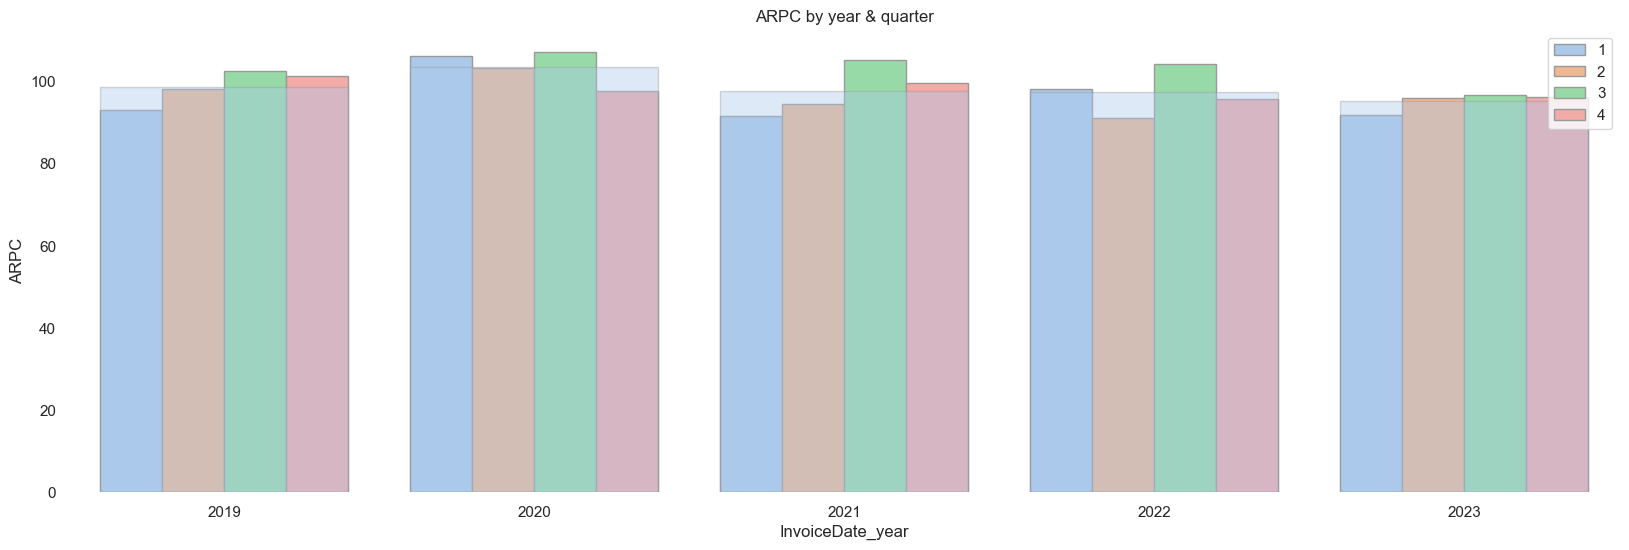

In [38]:
# Building a histogram that outlines average revenue per customer based on quarters and years

plt.figure(figsize=(20, 6))
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
plt.box(False)
sns.barplot(data=df_quarterly_order_avg, x='InvoiceDate_year', y='ARPC', hue='InvoiceDate_quarter',palette="pastel", edgecolor=".6", alpha = 1, errorbar=None)
sns.barplot(data=df_quarterly_order_avg, x='InvoiceDate_year', y='ARPC', alpha=0.4,errorbar=None, edgecolor=".6")

plt.title('ARPC by year & quarter')
plt.show()

Average revenue per customer drops since 2020 recording a drop of 6.7%.
Also, it is important to note that ARPU is the highest in 3rd quarter of each year.

### Average order value

In [23]:
# Calculation of AOV by quarters and years

df_aov = df.groupby(['InvoiceDate_year','InvoiceDate_quarter']).agg({'Total' : ['sum','count']})
df_aov.columns = ['Total_sales', 'Total_orders']
df_aov['AOV'] = df_aov['Total_sales']/df_aov['Total_orders']

df_aov

Total_sales  Total_orders         AOV
InvoiceDate_year InvoiceDate_quarter                                       
2019             1                       16833.79           182   92.493352
                 2                       17389.03           182   95.544121
                 3                       18236.46           179  101.879665
                 4                       18214.21           184   98.990272
2020             1                       18671.06           177  105.486215
                 2                       18270.41           179  102.069330
                 3                       17893.76           169  105.880237
                 4                       18965.42           198   95.784949
2021             1                       15820.14           174   90.920345
                 2                       15948.17           173   92.185954
                 3                       18606.52           180  103.369556
                 4                       17615.85           179   98.412570
2022             1                       16582.26           169   98.119882
                 2                       16308.90           181   90.104420
                 3                       17524.34           169  103.694320
                 4                       17722.70           186   95.283333
2023             1                       17075.81           186   91.805430
                 2                       17561.67           184   95.443859
                 3                       17581.56           183   96.074098
                 4                       17699.46           185   95.672757

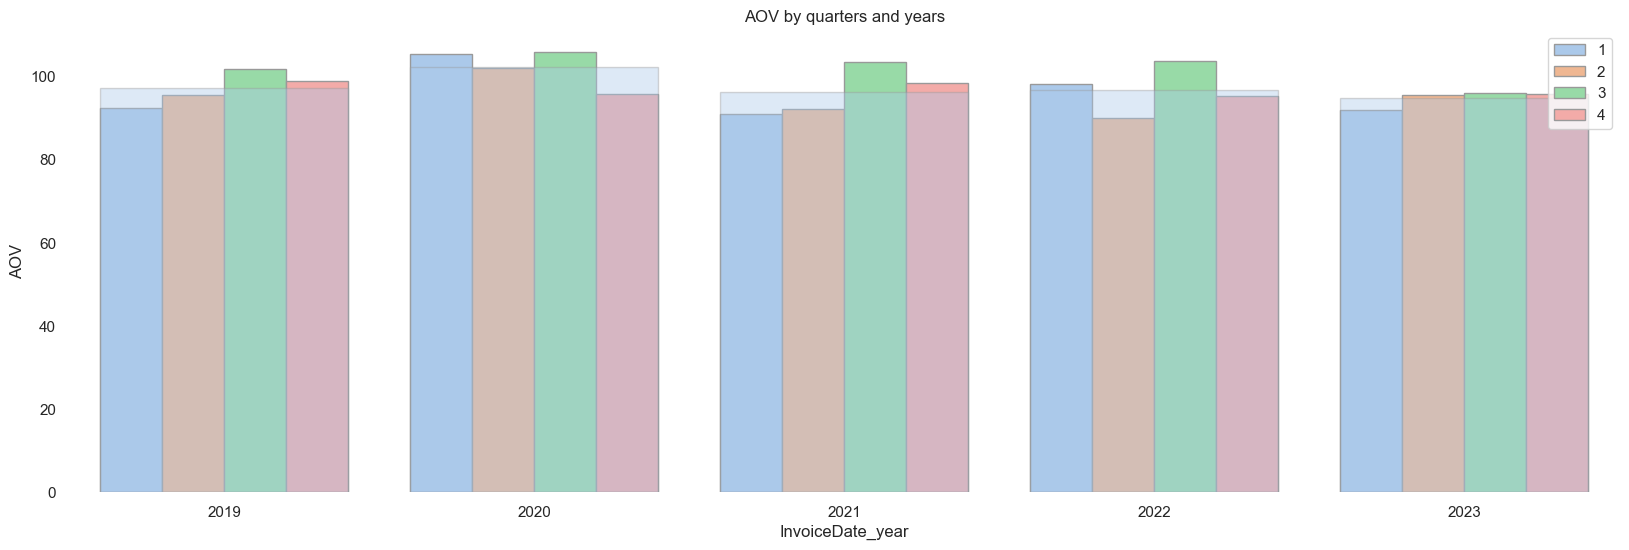

In [39]:
# Building a histogram

plt.figure(figsize=(20, 6))
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
plt.box(False)
sns.barplot(data=df_aov, x='InvoiceDate_year', y='AOV', hue='InvoiceDate_quarter',palette="pastel", edgecolor=".6", alpha=1)
sns.barplot(data=df_aov, x='InvoiceDate_year', y='AOV', edgecolor=".6", errorbar=None, alpha=0.4)
plt.title('AOV by quarters and years')
plt.show()

AOV plot behaves similarly to the ARPU plot

### Lifetime

In [25]:
# We find first and last purchase dates for each client

df_purchase_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()
df_purchase_dates.columns = ['CustomerID', 'first_purchase_date', 'last_purchase_date']

# Calculating lifetime

df_purchase_dates['lifetime'] = (df_purchase_dates['last_purchase_date'] - df_purchase_dates['first_purchase_date']).dt.days


In [26]:
# Calculating & printing average lifetime

print('Average lifetime for client is ' + str(round(df_purchase_dates['lifetime'].mean()))+' day')

Average lifetime for client is 121 day


## Retention

Let's calculate quarterly retention rate.
Quarterly Retention Rate = Retained Customers From Previous Quarter/Active Customers Total


In [27]:
# Creating year_quarter column for easier calculatons

df['year_quarter'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.quarter)

#identifying active users are active by looking at their revenue per quarter

df_user_purchase = df.groupby(['CustomerID','year_quarter'])['Total'].sum().reset_index()

#identifying active users are active by looking at their order count per quarter

df_user_purchase = df.groupby(['CustomerID','year_quarter'])['Total'].count().reset_index()

#create retention matrix with crosstab using purchase

df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['year_quarter']).reset_index() # reset_index() - Этот метод сбрасывает индекс DataFrame и заменяет его на обычный индекс, состоящий из целых чисел.

#creating an array of dictionary which keeps Retained & Total User count for each quarter

quarters = df_retention.columns[1:]
retention_array = []
for i in range(len(quarters)-1):
    retention_data = {}
    selected_quarter = quarters[i+1]
    prev_quarter = quarters[i]
    retention_data['year_quarter'] = int(selected_quarter)
    retention_data['TotalUserCount'] = df_retention[selected_quarter].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_quarter]>0) & (df_retention[prev_quarter]>0)][selected_quarter].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = round(df_retention['RetainedUserCount']/df_retention['TotalUserCount']*100,2)

df_retention

,year_quarter,TotalUserCount,RetainedUserCount,RetentionRate
0,201902,177,4,2.26
1,201903,178,1,0.56
2,201904,180,6,3.33
3,202001,176,5,2.84
4,202002,177,5,2.82
5,202003,167,2,1.20
6,202004,194,3,1.55
7,202101,173,3,1.73
8,202102,169,2,1.18
9,202103,177,2,1.13


In [28]:
print('Average retention rate is ' + str(round(df_retention['RetentionRate'].mean(),2)) + '% per quarter')

Average retention rate is 1.65% per quarter


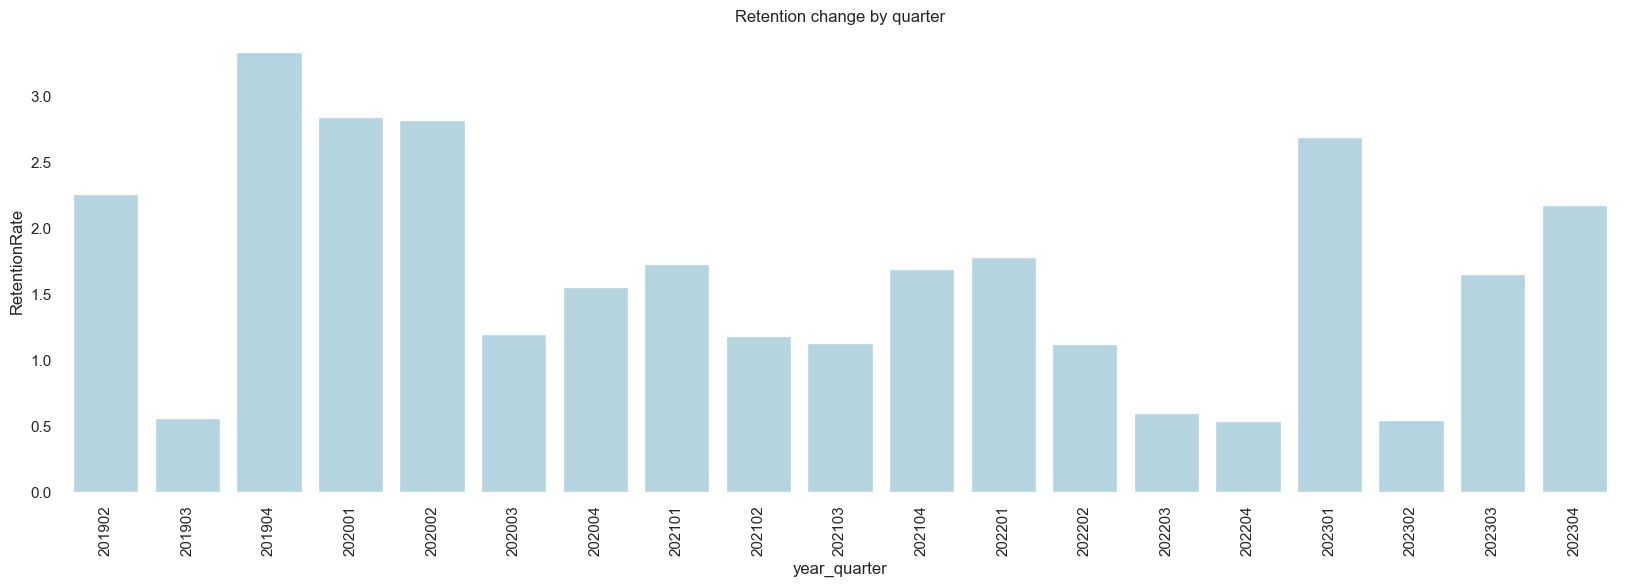

In [40]:
# Creating a histogram

plt.figure(figsize=(20, 6))
plt.box(False)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
sns.barplot(data=df_retention, x='year_quarter', y='RetentionRate', color = 'lightblue')
plt.title('Retention change by quarter')
plt.xticks(rotation=90)
plt.show()

The retention rate is quite low even for the highest quarters (3.33% max and 1.65% average)

## New clients vs existing clients

### Calculation of the growth of new users (sum of their orders)

In [30]:
# Create a DataFrame containing CustomerID and the first purchase date

df_min_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
df_min_purchase.columns = ['CustomerID', 'minpurchasedate']
df_min_purchase['minpurchasedate'] = df_min_purchase['minpurchasedate'].apply(lambda date: 100 * date.year + date.quarter)

# Merge the first purchase date column with the main DataFrame (df)

df = pd.merge(df, df_min_purchase, on='CustomerID')

# Create a column 'User Type' and assign 'Existing' if the user's first purchase was before the selected invoice date

df['usertype'] = 'New'
df.loc[df['year_quarter'] > df['minpurchasedate'], 'usertype'] = 'Existing'

# Calculate the revenue per quarter for each user type

df_user_type_revenue = df.groupby(['year_quarter', 'usertype', 'InvoiceDate_year_quarter'])['Total'].sum().reset_index()

df_user_type_revenue

,year_quarter,usertype,InvoiceDate_year_quarter,Total
0,201901,New,2019-01,16833.79
1,201902,Existing,2019-02,552.33
2,201902,New,2019-02,16836.70
3,201903,Existing,2019-03,867.15
4,201903,New,2019-03,17369.31
5,201904,Existing,2019-04,1760.89
6,201904,New,2019-04,16453.32
7,202001,Existing,2020-01,1383.59
8,202001,New,2020-01,17287.47
9,202002,Existing,2020-02,2102.80


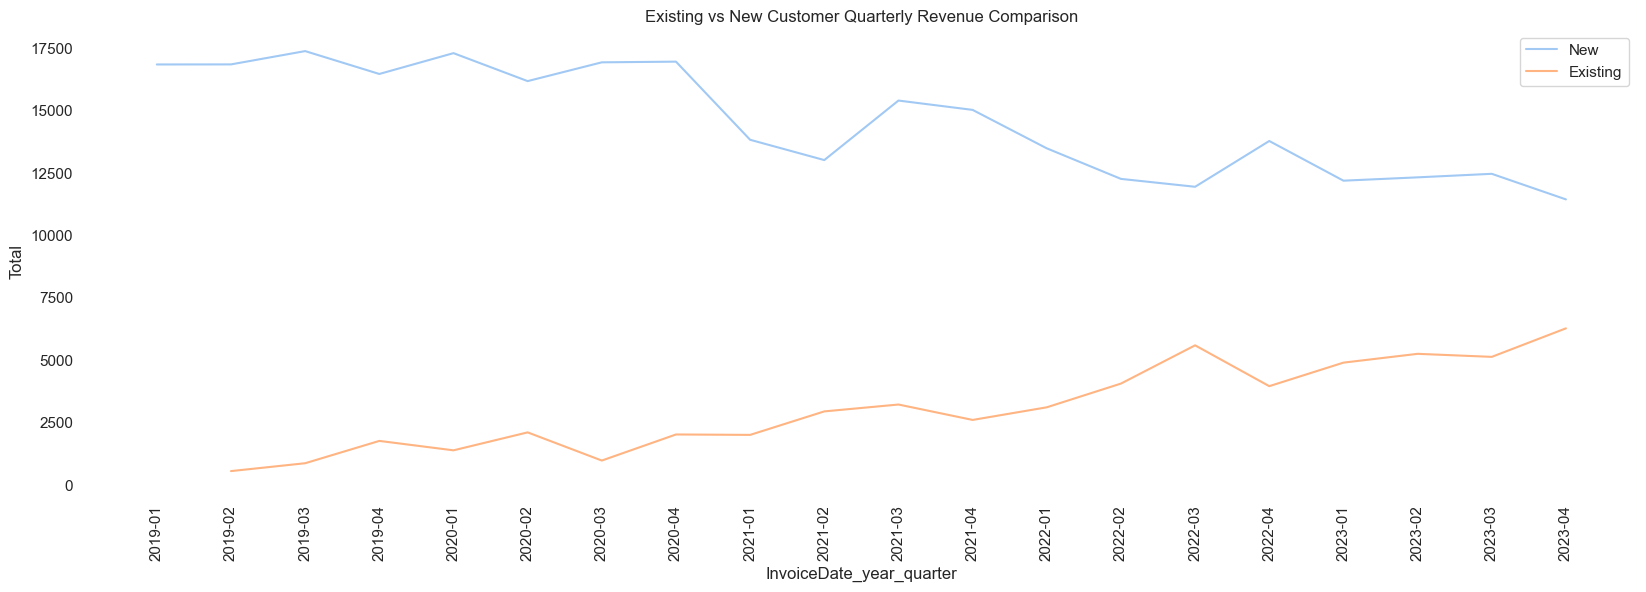

In [41]:
# Vizualizing via line plot

fig, ax = plt.subplots(figsize=(20, 6))
plt.box(False)
sns.set(palette='pastel', color_codes=True)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
ax = sns.lineplot(x='InvoiceDate_year_quarter', y='Total', data=df_user_type_revenue.query("usertype == 'New'"), label='New')
ax = sns.lineplot(x='InvoiceDate_year_quarter', y='Total', data=df_user_type_revenue.query("usertype == 'Existing'"), label='Existing')
ax.set_title('Existing vs New Customer Quarterly Revenue Comparison')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### New users 


Calculation of the amount of new users by quarter


In [32]:
# create a dataframe that shows new user ratio

df_user_ratio = df.query("usertype == 'New'").groupby(['InvoiceDate_year_quarter'])['CustomerID'].nunique()
df_user_ratio = df_user_ratio.reset_index()

# dropping nan values that resulted from first month

df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['InvoiceDate_year_quarter','new_cust_count']
df_user_ratio['new_cust_count'] = df_user_ratio['new_cust_count'].round(1)

df_user_ratio

,InvoiceDate_year_quarter,new_cust_count
0,2019-01,181
1,2019-02,173
2,2019-03,171
3,2019-04,166
4,2020-01,160
5,2020-02,156
6,2020-03,153
7,2020-04,173
8,2021-01,154
9,2021-02,140


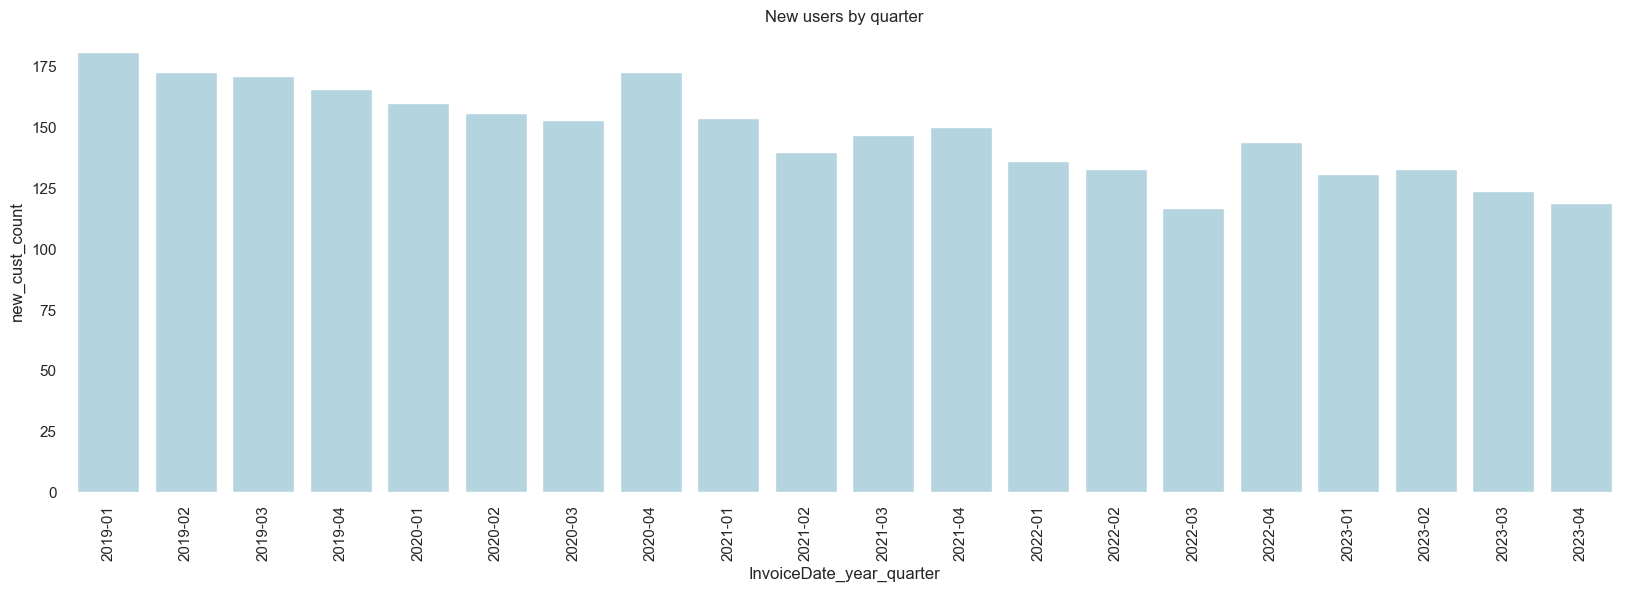

In [42]:
# Vizualization via histogram

plt.figure(figsize=(20, 6))
plt.box(False)
plt.rcParams['axes.facecolor'] = 'white' 
plt.rcParams['grid.color'] = 'white'  
sns.barplot(data=df_user_ratio, x='InvoiceDate_year_quarter', y='new_cust_count', color='lightblue')
ax.tick_params(axis='x', labelrotation=90)
plt.title('New users by quarter')
plt.xticks(rotation=90)
plt.show()


Our statistics data starts from 2019. It is absolutely natural to think that company already had existing clients. Assuming this and the average client lifetime of 121 days, we can start observation from Q3 2019.

Nevertheless, what we see is significant drop in the amount of new users even since Q3 2019. The average of 2020 year is 161 new client per quarter while in 2023 it is 127. The drop is 21.1%.

I'd advice to make efforts of attracting new clients: marketing campaigns, referral programs etc.



## АBC analysis of product categories

Goal: Identify the share of each product in the total sales volume.

The ABC method is based on the well-known Pareto principle: 80% of the total revenue comes from 20% of the sold products. According to the results, all analyzed products are divided into three groups:

- Group A. Trade engines, representing a share from 0 to 80% of cumulative revenue;
- Group B. Products with good demand, contributing to revenue from 81% to 95% cumulatively;
- Group C. Products in this group have a share of over 96% of cumulative revenue, bring in little profit, and are unprofitable.

In [34]:
# Creating a separate column 'Product-cat'

df['Product_cat'] = df['DeviceCategory'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['Product_cat'] = df['DeviceCategory'].astype(str) + '-' + df['Device'] + '-' + df['OS'].astype(str)

# Grouping and summing

df_abc = df.groupby('Product_cat')['Sales'].sum().reset_index()

# Conversion to numeric format

df_abc['Sales'] = df_abc['Sales'].astype(float)

# Calculation of the sales share for each category

df_abc['Share'] = round(df_abc['Sales'] / df_abc['Sales'].sum() * 100, 2)

# Sorting by sales share in descending order

df_abc_sorted = df_abc.sort_values(by='Share', ascending=False)

# Calculation of the cumulative sales share

df_abc_sorted['Cumulative_Share'] = np.cumsum(df_abc_sorted['Share'])

# Creating a DataFrame for ABC analysis

abc_analysis_df = df_abc_sorted.copy().reset_index()

# Dividing into ABC categories

abc_analysis_df['ABC_Category'] = pd.cut(abc_analysis_df['Cumulative_Share'],
                                         bins=[0, 80, 95, 100],
                                         labels=['A', 'B', 'C'])

abc_analysis_df


,index,Product_cat,Sales,Share,Cumulative_Share,ABC_Category
0,5,Computer-Laptop-Windows,66064.43,30.00,30.00,A
1,2,Computer-Desktop-Windows,56384.12,25.61,55.61,A
2,6,Mobile-Smart Phone-Android,23238.13,10.55,66.16,A
3,10,Mobile-Tablet-Windows,18309.02,8.31,74.47,A
4,1,Computer-Desktop-Mac,13526.35,6.14,80.61,B
5,3,Computer-Laptop-Linux,12394.38,5.63,86.24,B
6,9,Mobile-Tablet-Android,10556.18,4.79,91.03,B
7,7,Mobile-Smart Phone-Windows,10016.75,4.55,95.58,C
8,0,Computer-Desktop-Linux,5027.18,2.28,97.86,C
9,8,Mobile-Smart Phone-iOS,2733.96,1.24,99.10,C


The ABC analysis provides the following information: the flagship products in terms of sales are primarily PCs and laptops with the Windows operating system on board. Additionally, smartphones on Android and tablets on Windows sell well, contributing a significant portion of the revenue, accounting for almost 75% of the total sales.

Furthermore, an additional 16% of the revenue comes from the sales of Macs, laptops with Linux, and Android tablets. However, these categories do not have as high a contribution as the main flagship products.

The remaining product categories, which generate only 8% of the revenue, may require additional attention, and it might be worth reconsidering the sales strategy for effective assortment management.